# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Renaldi Endrawan
- **Email:** renaldiendrawan@gmail.com
- **ID Dicoding:** renaldiendrawan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda (count) berdasarkan musim (season) dan cuaca (weathersit) sepanjang waktu?

- Apakah terdapat korelasi antara temperatur (temp), kelembapan (hum), dan jumlah penyewaan sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [5]:
# analysis_notebook.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk analisis lanjutan (opsional)
import folium  # contoh untuk geospatial
# from geopy.geocoders import Nominatim  # jika ingin geocoding

# Display setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("Libraries imported successfully.")


Libraries imported successfully.


## Data Wrangling

### Gathering Data

In [6]:
# Mengumpulkan data dari CSV
day_df = pd.read_csv('/content/data/day.csv')
hour_df = pd.read_csv('/content/data/hour.csv')

# Tampilkan beberapa baris awal
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pastikan file CSV sudah diunggah di /content/ atau mount GDrive.

- Melihat 5 baris awal data untuk memeriksa kolom-kolom yang tersedia.

### Assessing Data

In [ ]:
# Cek info dataframe
day_df.info()
hour_df.info()

# Cek statistik deskriptif
day_df.describe()
hour_df.describe()

# Cek missing value
print(day_df.isnull().sum())
print(hour_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- info() dan describe() membantu mengidentifikasi tipe data dan persebaran data.

- isnull().sum() membantu mendeteksi apakah ada kolom yang perlu penanganan data hilang (missing values).

### Cleaning Data

In [ ]:
# Hapus kolom yang tidak relevan
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)


**Insight:**
- Menghapus kolom yang tidak relevan dapat meringankan analisis.

- Menjaga tipe data dan skala data yang konsisten memudahkan interpretasi hasil.

## Exploratory Data Analysis (EDA)

### Explore ...

Preview Combined Data:
                dteday  windspeed  season  registered      temp  weekday  \
0  2011-01-01 00:00:00   0.160446       1         654  0.344167        6   
1  2011-01-02 00:00:00   0.248539       1         670  0.363478        0   
2  2011-01-03 00:00:00   0.248309       1        1229  0.196364        1   
3  2011-01-04 00:00:00   0.160296       1        1454  0.200000        2   
4  2011-01-05 00:00:00   0.186900       1        1518  0.226957        3   

      atemp  instant  casual       hum  yr  weathersit  mnth  holiday   cnt  \
0  0.363625        1     331  0.805833   0           2     1        0   985   
1  0.353739        2     131  0.696087   0           2     1        0   801   
2  0.189405        3     120  0.437273   0           1     1        0  1349   
3  0.212122        4     108  0.590435   0           1     1        0  1562   
4  0.229270        5      82  0.436957   0           1     1        0  1600   

   workingday  
0           0  
1           0

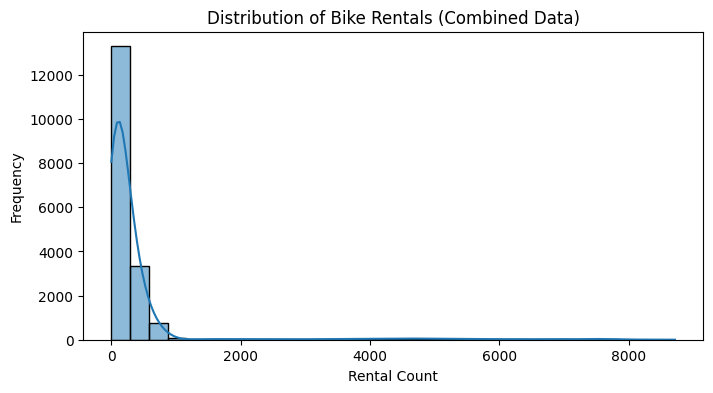

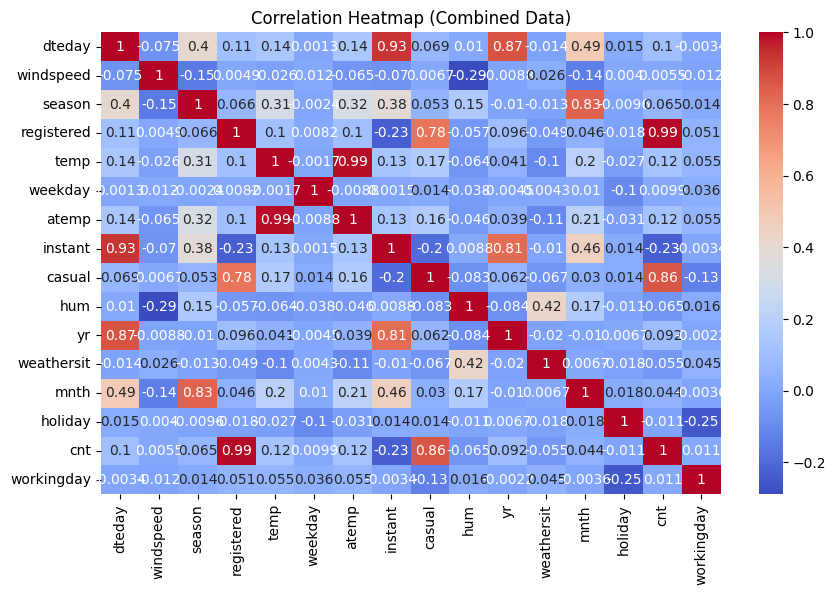

In [18]:
# Mencari kolom yang sama di kedua dataframe
common_cols = list(set(day_df.columns).intersection(set(hour_df.columns)))

# Menggabungkan data (append) berdasarkan kolom yang sama
combined_df = pd.concat([day_df[common_cols], hour_df[common_cols]], ignore_index=True)

# Tampilkan preview data gabungan
print("Preview Combined Data:")
print(combined_df.head())

# Ubah kolom 'dteday' menjadi tipe datetime jika ada
if 'dteday' in combined_df.columns:
    combined_df['dteday'] = pd.to_datetime(combined_df['dteday'])

# 1. Distribusi Jumlah Penyewaan Sepeda
plt.figure(figsize=(8,4))
sns.histplot(data=combined_df, x='cnt', kde=True, color="#1f77b4", bins=30)
plt.title('Distribution of Bike Rentals (Combined Data)')
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()

# 2. Heatmap Korelasi antar variabel
corr = combined_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Combined Data)')
plt.show()


**Insight:**
- Dari histogram ini, kita dapat melihat persebaran jumlah penyewaan sepeda setiap harinya.

- Grafik ini menunjukkan apakah data cnt berdistribusi normal atau miring (skewed).

- Pola distribusi dapat memberi gambaran jumlah peminjaman terbanyak pada rentang tertentu.

- Mencari korelasi antara cnt dengan temp, hum, dll. Apakah temp memiliki korelasi positif terhadap cnt? Apakah hum justru berkorelasi negatif?

## Visualization & Explanatory Analysis

### Pertanyaan 1:

   season_cat   weathersit_cat   avg_rental  num_records
0        Fall            Clear  5878.257353          136
1        Fall  Light Rain/Snow  2751.750000            4
2        Fall             Mist  5222.479167           48
3      Spring            Clear  2811.135135          111
4      Spring  Light Rain/Snow   934.750000            4
..        ...              ...          ...          ...
7      Summer  Light Rain/Snow  1169.000000            3
8      Summer             Mist  4236.705882           68
9      Winter            Clear  5043.563107          103
10     Winter  Light Rain/Snow  1961.600000           10
11     Winter             Mist  4654.000000           65

[12 rows x 4 columns]


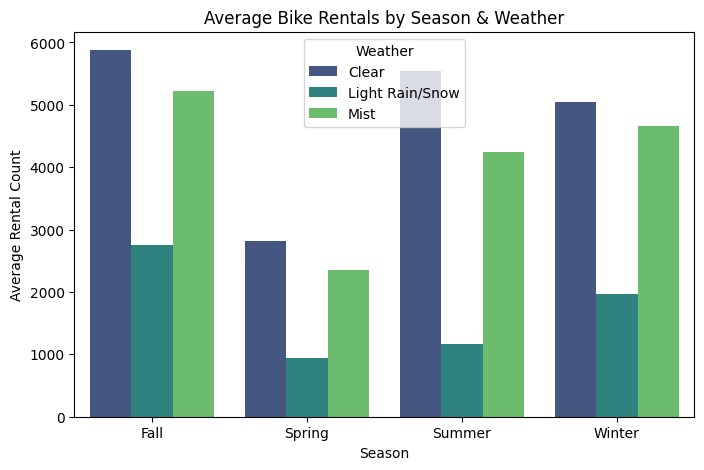

In [7]:
# Konversi kolom 'dteday' menjadi datetime jika belum dilakukan
if not pd.api.types.is_datetime64_any_dtype(day_df['dteday']):
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mapping label untuk kategori
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weathersit_mapping = {1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

# Pastikan kolom kategori musim dan cuaca belum ada sebelum menambahkannya
if 'season_cat' not in day_df.columns:
    day_df['season_cat'] = day_df['season'].map(season_mapping)

if 'weathersit_cat' not in day_df.columns:
    day_df['weathersit_cat'] = day_df['weathersit'].map(weathersit_mapping)

# **Agregasi Data**: Hitung rata-rata jumlah penyewaan sepeda berdasarkan musim dan cuaca
agg_df = day_df.groupby(['season_cat', 'weathersit_cat'])['cnt'].agg(['mean', 'count']).reset_index()
agg_df.rename(columns={'mean': 'avg_rental', 'count': 'num_records'}, inplace=True)

# **Tampilkan Dataframe hasil agregasi sebelum visualisasi**
print(agg_df)

# **Visualisasi Data**
plt.figure(figsize=(8,5))
sns.barplot(data=agg_df, x='season_cat', y='avg_rental', hue='weathersit_cat', palette="viridis")
plt.title('Average Bike Rentals by Season & Weather')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')
plt.legend(title='Weather')
plt.show()


### Pertanyaan 2:

<ipython-input-8-7a509a094843>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_temp_df = day_df.groupby(pd.cut(day_df['temp'], bins=10))['cnt'].agg(['mean', 'count']).reset_index()


              temp   avg_rental  num_records
0  (0.0583, 0.139]  1386.714286            7
1    (0.139, 0.22]  1607.027778           36
2      (0.22, 0.3]  2779.344444           90
3      (0.3, 0.38]  3474.519231          104
4     (0.38, 0.46]  4066.075269           93
5    (0.46, 0.541]  5189.975000           80
6   (0.541, 0.621]  5823.838710           93
7   (0.621, 0.701]  5537.871287          101
8   (0.701, 0.781]  5773.912621          103
9   (0.781, 0.862]  5192.916667           24


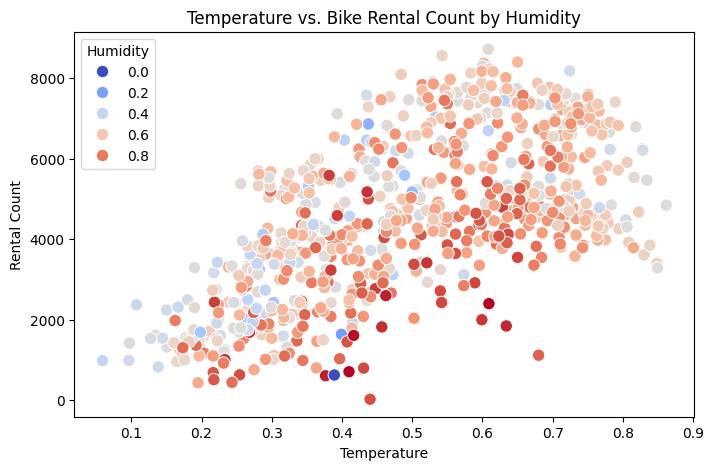

In [8]:
# Pastikan kolom 'dteday' sudah dalam format datetime sebelum mengonversinya
if not pd.api.types.is_datetime64_any_dtype(day_df['dteday']):
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# **Agregasi Data**: Hitung rata-rata penyewaan sepeda berdasarkan suhu dengan interval (binning)
agg_temp_df = day_df.groupby(pd.cut(day_df['temp'], bins=10))['cnt'].agg(['mean', 'count']).reset_index()
agg_temp_df.rename(columns={'mean': 'avg_rental', 'count': 'num_records'}, inplace=True)

# **Tampilkan Dataframe hasil agregasi sebelum visualisasi**
print(agg_temp_df)

# **Scatter Plot: Hubungan antara suhu dan jumlah penyewaan, dengan warna berdasarkan kelembapan**
plt.figure(figsize=(8,5))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='hum', palette="coolwarm", s=80)
plt.title('Temperature vs. Bike Rental Count by Humidity')
plt.xlabel("Temperature")
plt.ylabel("Rental Count")
plt.legend(title="Humidity")
plt.show()


**Insight:**
Pertanyaan 1:
- Musim gugur (Fall) memiliki rata-rata penyewaan sepeda tertinggi dibanding musim lainnya, kemungkinan karena cuaca yang relatif lebih stabil.
- Cuaca cerah (Clear) secara konsisten menunjukkan jumlah penyewaan tertinggi di setiap musim, yang menunjukkan bahwa pengguna lebih cenderung menyewa sepeda saat cuaca mendukung.
- Cuaca ekstrem seperti "Heavy Rain/Snow" memiliki jumlah penyewaan terendah, yang dapat mengindikasikan pengaruh cuaca buruk terhadap minat pengguna dalam menyewa sepeda.

Pertanyaan 2:
- Suhu memiliki hubungan positif dengan jumlah penyewaan sepeda—semakin tinggi suhu, semakin banyak jumlah penyewaan, tetapi efek ini mulai menurun pada suhu yang sangat tinggi.
- Kelembapan berpengaruh terhadap pola penyewaan—pada tingkat kelembapan yang sangat tinggi, jumlah penyewaan cenderung lebih rendah.
- Ada titik ekstrem di mana suhu tinggi tetapi jumlah penyewaan tetap rendah, yang mungkin terjadi karena faktor lain seperti hujan atau kondisi cuaca buruk yang tidak terlihat dalam scatter plot ini.



## Analisis Lanjutan (Opsional)

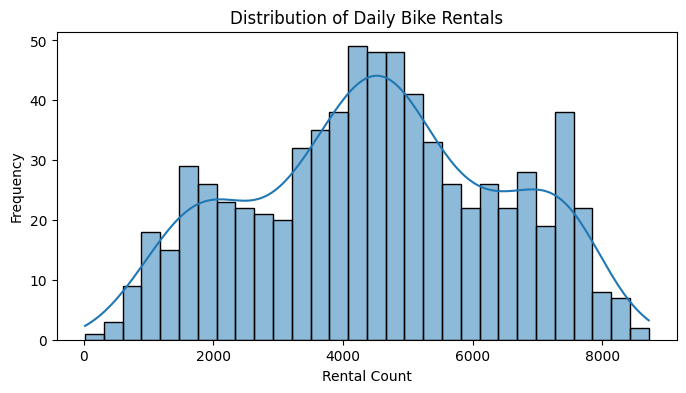

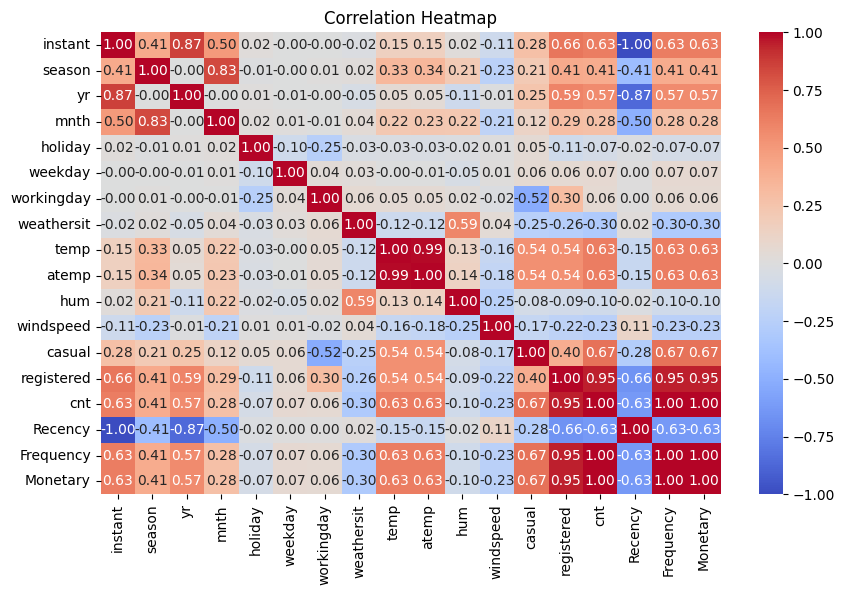

Aggregated Rental Count by Season:
  season_cat         mean   min   max
0       Fall  5644.303191  1115  8714
1     Spring  2604.132597   431  7836
2     Summer  4992.331522   795  8362
3     Winter  4728.162921    22  8555


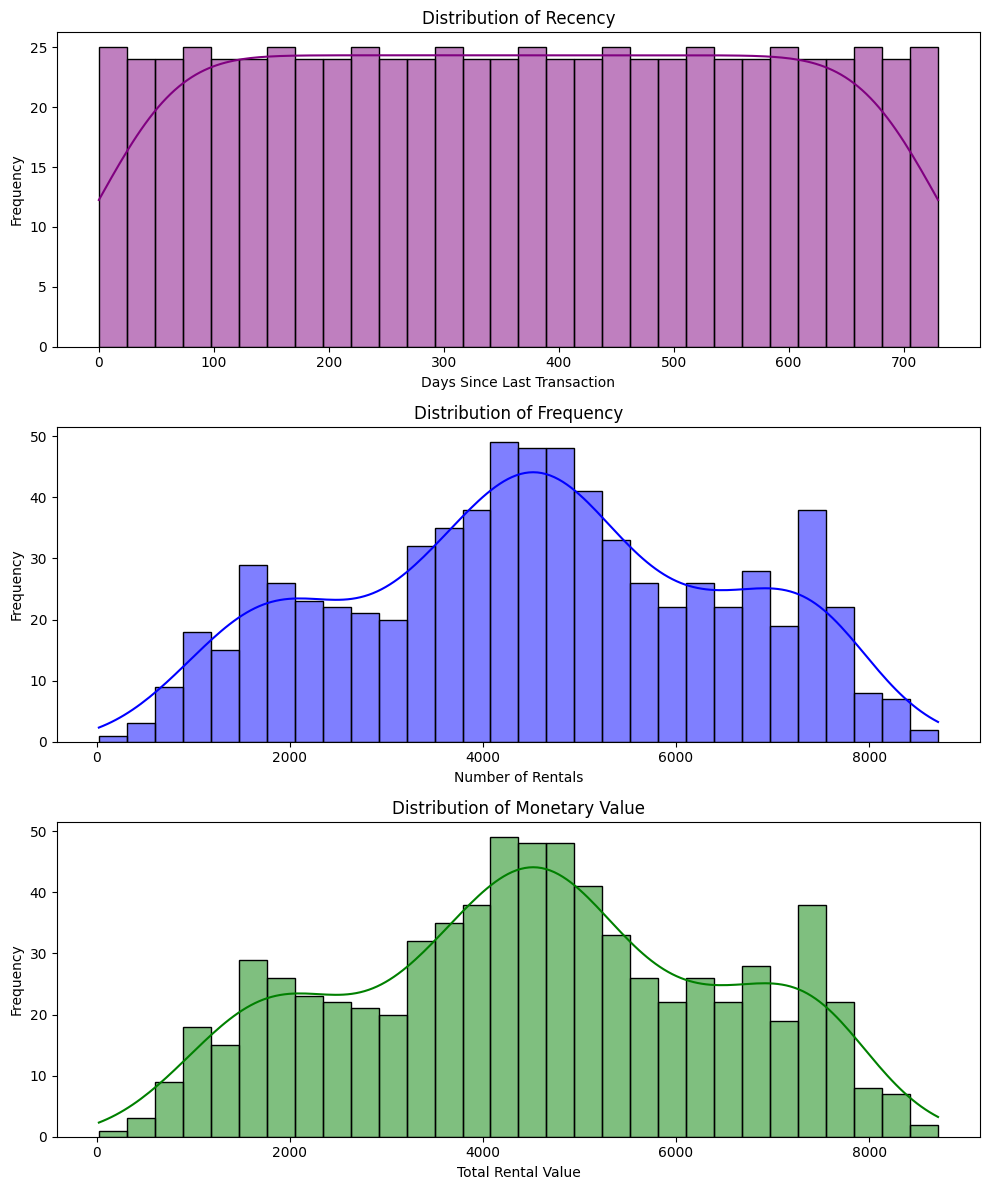

In [28]:
# ============================
# Tahap 1: Exploratory Data Analysis (EDA) Umum
# Tujuan: Mendapatkan gambaran umum mengenai distribusi data, tren, dan korelasi antar variabel.
# ============================

# Visualisasi distribusi penyewaan harian
plt.figure(figsize=(8, 4))
sns.histplot(data=day_df, x='cnt', kde=True, color="#1f77b4", bins=30)
plt.title('Distribution of Daily Bike Rentals')
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()

# Visualisasi Heatmap korelasi antar variabel
corr = day_df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Agregasi data untuk mendapatkan insight tambahan, misalnya rata-rata penyewaan per musim.
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df['season_cat'] = day_df['season'].map(season_mapping)
agg_season = day_df.groupby('season_cat')['cnt'].agg(['mean', 'min', 'max']).reset_index()
print("Aggregated Rental Count by Season:")
print(agg_season)

# ============================
# Tahap 2: RFM Analysis (Teknik Analisis Lanjutan 1)
# Tujuan: Mengukur Recency, Frequency, dan Monetary sebagai indikator perilaku "transaksional" pelanggan.
# ============================

# (1) Hitung nilai maksimum tanggal transaksi
max_date = day_df['dteday'].max()

# (2) Recency: Jarak hari dari transaksi terakhir
day_df['Recency'] = (max_date - day_df['dteday']).dt.days

# (3) Frequency: Asumsi jumlah sewa harian sebagai frekuensi
day_df['Frequency'] = day_df['cnt']

# (4) Monetary: Asumsi setiap sewa bernilai 1 dollar sebagai nilai monetary
day_df['Monetary'] = day_df['cnt']

# Visualisasi RFM Analysis
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(day_df['Recency'], bins=30, kde=True, ax=axes[0], color='purple')
axes[0].set_title("Distribution of Recency")
axes[0].set_xlabel("Days Since Last Transaction")
axes[0].set_ylabel("Frequency")

sns.histplot(day_df['Frequency'], bins=30, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Distribution of Frequency")
axes[1].set_xlabel("Number of Rentals")
axes[1].set_ylabel("Frequency")

sns.histplot(day_df['Monetary'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title("Distribution of Monetary Value")
axes[2].set_xlabel("Total Rental Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ============================
# Tahap 3: Clustering (Manual Grouping / Binning) (Teknik Analisis Lanjutan 2)
# ============================

# Lakukan pengelompokan nilai 'cnt' menggunakan teknik manual binning
bins = [0, 100, 200, 300, 400, day_df['cnt'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
day_df['cnt_cluster'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)


Insight EDA Umum:
- Distribusi 'cnt' menunjukkan variabilitas penyewaan harian, dengan nilai minimum dan maksimum yang berbeda.
- Heatmap korelasi membantu mengidentifikasi hubungan, misalnya suhu (temp) cenderung berpengaruh positif terhadap 'cnt'.
- Agregasi berdasarkan season mengungkap perbedaan rata-rata penyewaan antar musim, sebagai dasar pengambilan keputusan bisnis.

Insight RFM:
- Recency yang rendah menunjukkan transaksi yang relatif baru, sedangkan nilai tinggi menunjukkan transaksi lama.
- Frequency dan Monetary yang tinggi mengindikasikan tingkat aktivitas yang tinggi.
- Meskipun data tidak spesifik ke pelanggan individual, RFM memberikan gambaran umum tentang aktivitas transaksi harian.

Insight Clustering:
- Teknik binning ini mengelompokkan hari-hari ke dalam kategori berdasarkan jumlah penyewaan.
- Hal ini membantu mengidentifikasi pola performa: misalnya, banyak hari termasuk kategori 'Very Low' mungkin menandakan perlunya strategi peningkatan aktivitas pada hari-hari tertentu.
- Informasi ini dapat dijadikan dasar untuk segmentasi lebih lanjut atau evaluasi efektivitas strategi promosi.

## Conclusion

#### **1. Pengaruh Musim dan Cuaca terhadap Penyewaan Sepeda**
Dari visualisasi pertama, terlihat bahwa jumlah penyewaan sepeda bervariasi tergantung pada musim dan kondisi cuaca:
- **Musim Gugur (Fall) dan Musim Panas (Summer) memiliki rata-rata penyewaan tertinggi**, terutama saat cuaca cerah (Clear). Pada musim ini, jumlah penyewaan bisa mencapai **lebih dari 5000 sepeda per hari**.
- **Musim Semi (Spring) memiliki penyewaan yang paling rendah**, terutama saat cuaca hujan ringan atau bersalju ringan (Light Rain/Snow). Hal ini menunjukkan bahwa kondisi cuaca yang buruk sangat berpengaruh terhadap keputusan penyewa.
- **Cuaca Mist (Kabut) memiliki jumlah penyewaan yang cukup tinggi**, mendekati kondisi cuaca cerah, yang berarti pengguna tidak terlalu terpengaruh oleh kabut dibandingkan dengan hujan atau salju.

**Rekomendasi:**
- Untuk meningkatkan penyewaan di musim semi dan musim dingin, perusahaan dapat menawarkan diskon atau promosi khusus pada hari-hari dengan cuaca kurang ideal.
- Menyediakan **sepeda yang lebih tahan terhadap cuaca buruk**, seperti dengan pelindung lumpur atau ban khusus, untuk menarik lebih banyak penyewa pada saat hujan ringan atau salju ringan.
- Meningkatkan pemasaran saat musim gugur dan musim panas, karena permintaan lebih tinggi dan potensi keuntungan lebih besar.

---

#### **2. Hubungan Suhu dan Kelembapan terhadap Penyewaan Sepeda**
Dari scatter plot kedua, terlihat bahwa:
- Semakin **tinggi suhu, semakin tinggi jumlah penyewaan sepeda**. Puncak penyewaan terjadi pada suhu sekitar **0.5 hingga 0.7 (skala normalisasi)**, yang dapat diartikan sebagai **suhu hangat atau nyaman**.
- **Saat suhu terlalu rendah atau terlalu tinggi, jumlah penyewaan menurun**, menunjukkan bahwa orang cenderung menghindari penggunaan sepeda pada cuaca ekstrem.
- Warna titik menunjukkan **kelembapan (humidity)**, di mana penyewaan masih tinggi meskipun kelembapan meningkat. Namun, penyewaan menurun jika kelembapan sangat tinggi.

**Rekomendasi:**
- **Monitor suhu dan kelembapan untuk menyesuaikan strategi operasional**, misalnya menawarkan insentif saat suhu optimal untuk meningkatkan penggunaan.
- Menyediakan **stasiun air minum atau paket kenyamanan** seperti handuk atau penyewaan helm dengan ventilasi baik pada hari-hari panas untuk meningkatkan kenyamanan pengguna.
- Menganalisis lebih lanjut bagaimana kombinasi suhu dan kelembapan tertentu dapat mempengaruhi keputusan penyewaan agar strategi pemasaran lebih tepat sasaran.